---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Data Preparation**](#Section6)</br> 
7. [**Principal Component Analysis - PCA**](#Section7)</br>
8. [**SMOTE Technique**](#Section8)</br>
9. [**Model Building**](#Section9)
10. [**Summary**](#Section10)</br>


---

---
<a name = Section1></a>
# **1. Introduction**
---

Gene Expression dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). 
<p><p align="left"><img src="https://iiif.elifesciences.org/journal-cms/subjects%2F2020-11%2Felife-sciences-chromosomes-and-gene-expression-illustration.jpg/0,1,7016,2081/2000,/0/default.jpg"></p>
</p>

---
<a name = Section2></a>
# **2. Problem Statement**
---
There are two datasets containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood. Intensity values have been re-scaled such that overall intensities for each chip are equivalent.

-To build a model to claasify the patient with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).
 


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---
- This section is emphasised on installing and importing the necessary libraries that will be required.

<a id = Section31></a>
## 3.1 **Installing and Upgrading Libraries**

In [1]:
!pip install -q datascience                                      
!pip install -q pandas-profiling        

In [2]:
!pip install -q imblearn

In [3]:
!pip install -q --upgrade pandas-profiling     

<a id = Section32></a>
## 3.2 **Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint

#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings. filterwarnings("ignore") 
#---------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score , cross_val_predict ,GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score , recall_score , f1_score, plot_confusion_matrix ,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,plot_tree  
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
#---------------------------------------------------------------------
from collections import Counter

#--------------------------------------------------
from imblearn.over_sampling import SMOTE

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

__a__. How was it collected? 

Golub et al "Molecular Classification of Cancer: Class Discovery and Class
Prediction by Gene Expression Monitoring"

There are two datasets containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood.

In the actual.csv, which stores the labels, the patent ids go from 1 to 72 in ascending order.

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

__c__. The datasets used for the analysis is 

- data_set_ALL_AML_train.csv
- data_set_ALL_AML_independent.csv
- actual.csv 

<a id = Section41></a>
## 4.1 **Data Information**

## **4.1.1 Importing Data Set 1 - data_set_ALL_AML_train.csv**

In [5]:
df_gene_exp_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/gayathrig21/Gene-Expression-Dataset/main/data_set_ALL_AML_train.csv')
print('Data Shape:', df_gene_exp_train.shape)
df_gene_exp_train.head(3)

Data Shape: (7129, 78)


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A


This is **training dataset** which has 78 columns and 7129 rows.

In [6]:
df_gene_exp_train.isnull().sum().any()

False

**No missing / null** values in the dataset

In [7]:
df_gene_exp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  7                      7129 non-null   int64 
 15  call.6               

## **4.1.2 Importing Data Set 2 - data_set_ALL_AML_independent.csv**

In [8]:
df_gene_exp_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/gayathrig21/Gene-Expression-Dataset/main/data_set_ALL_AML_independent.csv')
print('Data Shape:', df_gene_exp_test.shape)
df_gene_exp_test.head(3)

Data Shape: (7129, 70)


,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A


This is **testing dataset** which has 70 columns and 7129 columns rows. Here, the number of columns is not same as training dataset but number of rows are same.

In [9]:
df_gene_exp_test.isnull().sum().any()

False

**No missing / null** values in the dataset

In [10]:
df_gene_exp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   39                     7129 non-null   int64 
 3   call                   7129 non-null   object
 4   40                     7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   42                     7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   47                     7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  48                     7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  49                     7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  41                     7129 non-null   int64 
 15  call.6               

## **4.1.3 Importing Data Set 3 - actual.csv**

In [11]:
df_actual = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/gayathrig21/Gene-Expression-Dataset/main/actual.csv')
print('Data Shape:', df_actual.shape)
df_actual.head(3)

Data Shape: (72, 2)


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL


In [12]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   patient  72 non-null     int64 
 1   cancer   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [13]:
df_actual.isnull().sum().any()

False

**No missing / null** values in the dataset

In [14]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   patient  72 non-null     int64 
 1   cancer   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


The **7129 gene descriptions** are provided as the rows and the values for each patient as the columns. This will clearly require some tidying up.

The numbered columns refer to the **72 patients** in the study, cross-indexed to the ground truth in actual.csv. By taking all 7129 genes (or fewer, if we feature engineer) for patient 1, we should be able to predict Acute Myeloid Leukemia (AML) or Acute Lymphoblastic Leukemia (ALL).

<a id = Section42></a>
## 4.2 **Data Cleaning**

## **4.2.1 Removing Call Columns**

The call columns are a decision on whether that gene is present in the preceding column. We dont need it for the anaysis and it is a classification column if a particular gene is (**A**) Absent, (**P**) Present or (**M**) Marginal.

In [15]:
call_cols_to_drop_train = [col for col in df_gene_exp_train.columns if 'call'  in col]
call_cols_to_drop_test = [col for col in df_gene_exp_test.columns if 'call'  in col]

In [16]:
df_gene_exp_train.drop(call_cols_to_drop_train , axis=1 , inplace=True)
df_gene_exp_test.drop(call_cols_to_drop_test , axis=1 , inplace=True)

In [17]:
df_gene_exp_train.shape

(7129, 40)

In [18]:
df_gene_exp_test.shape

(7129, 36)

Now both the **training** and **testing** dataset has 7129 rows  but 40 and 36 columns respectively

## **4.2.2 Transposing Dataset**

As the **gene descriptions (7129)** are provided as rows and numbered columns are **patient id**  , we need to transponse the dataset 

In [19]:
df_gene_exp_train_t= df_gene_exp_train.T
df_gene_exp_train_t.shape

(40, 7129)

In [20]:
df_gene_exp_test_t= df_gene_exp_test.T
df_gene_exp_test_t.shape

(36, 7129)

Now we have **7129** columns in both the **training and testing** dataset 

## **4.2.3 Clean Up and Dataset Building**

Here we will concatenate both the **training and testing** dataset. We can split the training and testing dataset later

In [21]:
df_gene_exp=pd.concat([df_gene_exp_train_t, df_gene_exp_test_t])
df_gene_exp.shape

(76, 7129)

The dataset now consists of **76** rows and **7129** columns

In [22]:
df_gene_exp.isnull().sum().any()

False

**No missing/null** values in the dataset

In [23]:
df_gene_exp.head(3)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37


We can drop **Gene Description and Gene Accession Number** row as they do not provide useful information for building a model

In [24]:
rows_to_drop =['Gene Description','Gene Accession Number']
df_gene_exp.drop(rows_to_drop , axis=0 , inplace=True)

In [25]:
df_gene_exp = df_gene_exp.reset_index()
df_gene_exp.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
          7119,    7120,    7121,    7122,    7123,    7124,    7125,    7126,
          7127,    7128],
      dtype='object', length=7130)

Renaming the **index** column to **patient_id**

In [26]:
df_gene_exp.rename(columns={'index':'patient_id'} , inplace = True)

In [27]:
df_gene_exp.head()

,patient_id,0,1,2,3,4,5,6,7,8,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25


In [28]:
df_gene_exp.shape

(72, 7130)

In [29]:
df_gene_exp = df_gene_exp.astype({"patient_id": int})

Renaming the column  **patient** to **patient_id** in the actual dataset so that it can be merged to the main dataset

In [30]:
df_actual.rename(columns={'patient':'patient_id'} , inplace = True)

In [31]:
df_actual.head(3)

,patient_id,cancer
0,1,ALL
1,2,ALL
2,3,ALL


Merging the actual and main dataset

In [32]:
df_gene_exp= pd.merge(df_gene_exp, df_actual, on='patient_id')

In [33]:
df_gene_exp.head(3)

,patient_id,0,1,2,3,4,5,6,7,8,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,511,-125,389,-37,793,329,36,191,-37,ALL
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,837,-36,442,-17,782,295,11,76,-14,ALL
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,1199,33,168,52,1138,777,41,228,-41,ALL


In [34]:
df_gene_exp.isnull().sum().any()

False

In [35]:
df_gene_exp.shape


(72, 7131)

We can now drop the **patient id** column from this dataset

In [36]:
df_gene_exp.drop(['patient_id'] , axis=1 , inplace=True)

---
<a name = Section5></a>
# 5. Exploratory Data Analysis 
---

As there are **7130 columns** in the dataset, it is not possible to analyse every column and perform EDA 

We can perform some analysis on target variable 

In [37]:
df_gene_exp['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

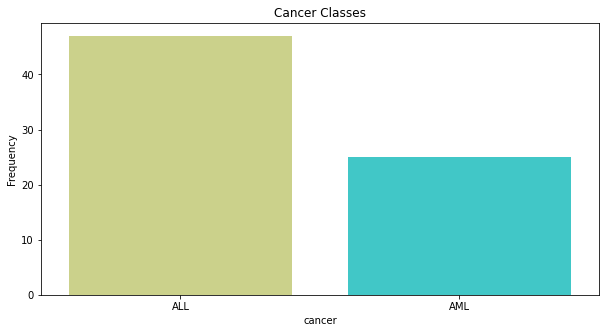

In [38]:
plt.figure(figsize=(10,5))
sns.countplot('cancer',data = df_gene_exp, order = df_gene_exp['cancer'].value_counts().index,palette="rainbow_r")
plt.title("Cancer Classes")
plt.ylabel('Frequency')
plt.show()

The value count of **ALL and AML** and **47 and 25** respectively which shows that dataset is **highly imbalanced**

---
<a name = Section6></a>
# 6. Data Preparation
---

## 6.1 Encoding target variable

Encoding the target variable by replacing **ALL to 1 and AML to 0**

In [39]:
df_gene_exp['cancer'].replace({'ALL':1, 'AML':0}, inplace=True)

In [40]:
df_gene_exp.head(3)

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,1
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,1


## 6.2 Preparing X and y using pandas

In [41]:
X = df_gene_exp.loc[:, df_gene_exp.columns != 'cancer']
X.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [42]:
y = df_gene_exp['cancer']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: cancer, dtype: int64

## 6.3 Train Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52, stratify=y)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(54, 7129)
(54,)
(18, 7129)
(18,)


## 6.4 Feature Scaling

<AxesSubplot:ylabel='Density'>

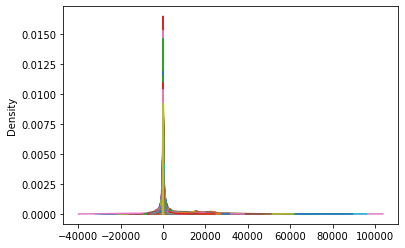

In [44]:
#before feature scaling
X_train_df = pd.DataFrame(X_train)
X_train_df.plot(kind="kde", legend=None)

In [45]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

<AxesSubplot:ylabel='Density'>

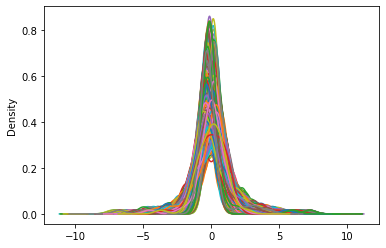

In [46]:
#after feature scaling
X_train_sc_df = pd.DataFrame(X_train_sc)
X_train_sc_df.plot(kind="kde", legend=None)

---
<a name = Section7></a>
# 7. Principle Component Analysis - PCA
---

## 7.1 Dimensionality Reduction

- One of the major problems with this dataset is that it has **too many predictors** (almost 7000+).

- To go through each of these predictors and see which ones are significant for the model is going to be a **tedious** task.

- Instead, we can use a **dimensionality reduction** technique - **Principle Component Analysis**.


 We are specifying **90% variance** (0.90) to be explained by our PCA model out of a total of 100%

In [47]:
X_pca_train = PCA(0.90 , random_state=0).fit(X_train_sc)

## 7.2 Variance Graph

- Plotting the variance graph to show the **amount** of **variance explained** with respect to the **number of features**.

- We are using `pca.explained_variance_ratio_` to plot the explained variance of our PCA model.

In [48]:
X_var = np.cumsum(np.round(X_pca_train.explained_variance_ratio_, decimals=3) * 100)

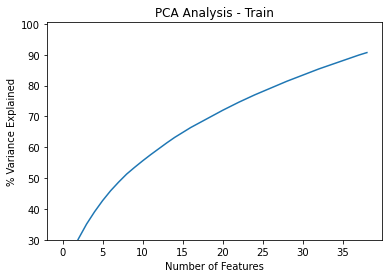

In [49]:
plt.plot(X_var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis - Train')
plt.ylim(30, 100.5)
plt.style.context('seaborn-whitegrid')

In [50]:
print('%d components explain 90%% of the variation in data' % X_pca_train.n_components_)

39 components explain 90% of the variation in data


- We can see that the first __39 Principal Components attribute for about 90% variation__ in the data.

- We shall use these 38 out of 7130 for our prediction which is NOT bad 


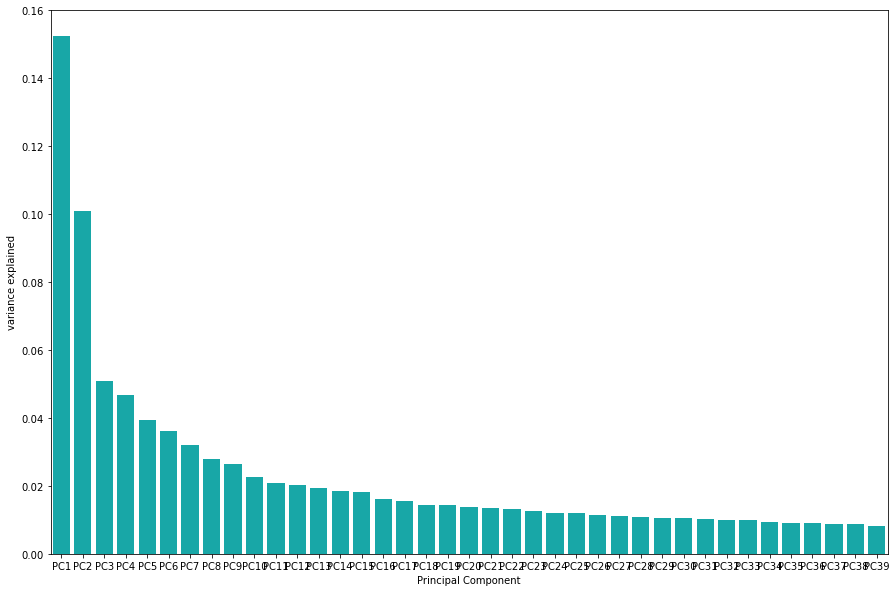

In [51]:
# details on variance or information on how it gets distributed between each component, viewing it with help of bar plots
df = pd.DataFrame({'variance explained':X_pca_train.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13',
                                   'PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26',
                                   'PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39']})
plt.figure(figsize=(15,10))
sns.barplot(x='Principal Component',y="variance explained", data=df, color="c");

## 7.3 Visualizing PCA

In [52]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
PC_df = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
PC_df.head()

,PC1,PC2
0,-12371.342324,-16505.718775
1,-37565.867256,57.630663
2,-19116.366314,-18216.306299
3,-8712.904153,-17386.581281
4,-29690.895016,-12205.173864


In [53]:
data_viz_Df = pd.concat([PC_df, df_gene_exp['cancer']], axis = 1)
data_viz_Df.head()

,PC1,PC2,cancer
0,-12371.342324,-16505.718775,1
1,-37565.867256,57.630663,1
2,-19116.366314,-18216.306299,1
3,-8712.904153,-17386.581281,1
4,-29690.895016,-12205.173864,1


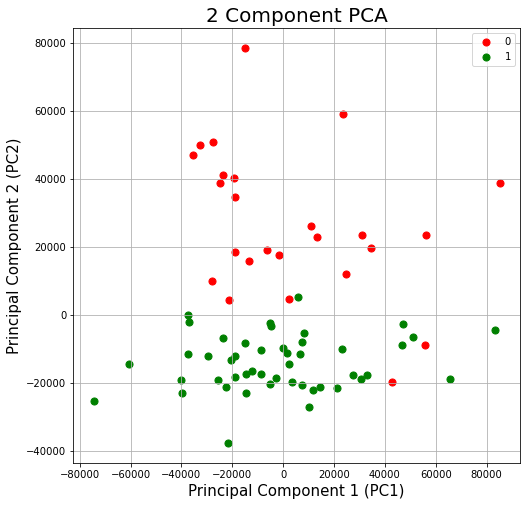

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 (PC1)', fontsize = 15)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data_viz_Df['cancer'] == target
    ax.scatter(data_viz_Df.loc[indicesToKeep, 'PC1']
               , data_viz_Df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 7.4  Building a **new** PCA model.

- We are specifying `n_components` equal to **38**.

  - This will allow our model to only use the **first 38 Principal Components** only.

- We are then transforming the dataset using our PCA model.

In [55]:
pca = PCA(n_components=X_pca_train.n_components_, random_state=55)
pca.fit(X_train_sc)
X_pca_train= pca.transform(X_train_sc)
X_pca_test= pca.transform(X_test_sc)
print(X_pca_train.shape)
print(X_pca_test.shape)

(54, 39)
(18, 39)


Confirming the claim: PCA gives us output where Multicollinearity is eliminated

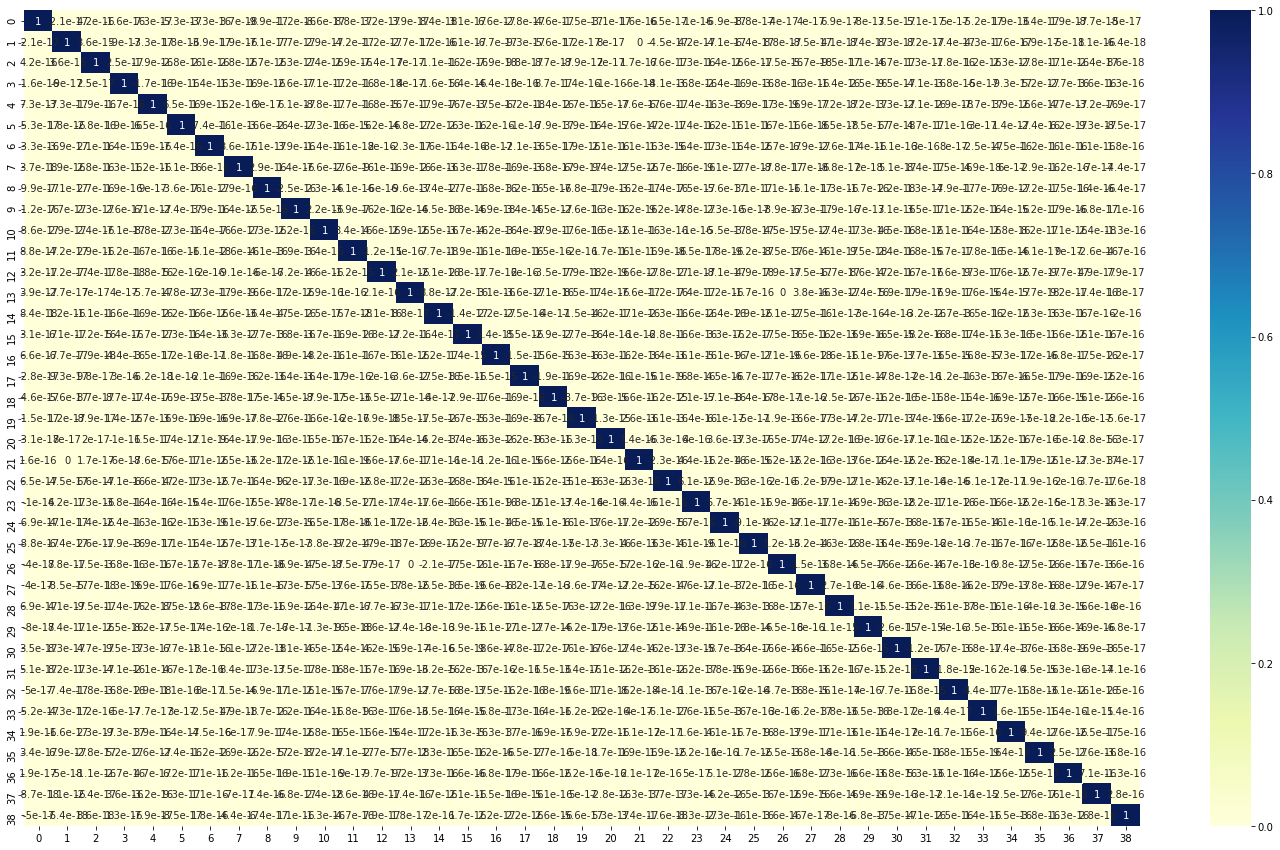

In [56]:
X_df_pca_train=pd.DataFrame(X_pca_train)
plt.figure(figsize = (25, 15))
sns.heatmap(X_df_pca_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

The above output has numbers that show correlation coef's as close to 0

---
<a name = Section8></a>
# 8. SMOTE Technique
---

In [57]:
print("Before Upsampling train and test:-")
print(Counter(y_train))
print(Counter(y_test))

# Let's use SMOTE to oversample

oversample = SMOTE()
X_smote_train, y_smote_train = oversample.fit_resample(X_pca_train,y_train)
X_smote_test, y_smote_test = oversample.fit_resample(X_pca_test,y_test)
print("After Upsampling train and test:-")
print(Counter(y_smote_train))
print(Counter(y_smote_test))

Before Upsampling train and test:-
Counter({1: 35, 0: 19})
Counter({1: 12, 0: 6})
After Upsampling train and test:-
Counter({1: 35, 0: 35})
Counter({1: 12, 0: 12})


In [58]:
print(X_smote_train.shape )
print(X_smote_test.shape )
print(y_smote_train.shape )
print(y_smote_test.shape )

(70, 39)
(24, 39)
(70,)
(24,)


---
<a name = Section9></a>
# 9. Model Building
---

We are going to use the clasification algorithm for model building. 

Create functions to fit, predict and measure the performance of the classification models 

Initialize dataframe to hold and compare the performance metrics of the models created

In [59]:
df_model=pd.DataFrame(columns=['Model','Accuracy Score' ,'F1 Score', 'Precision Score' , 'Recall Score' ,'ROC AUC'])
df_model_performance =df_model
df_model_test_train_acc = pd.DataFrame(columns=['Model' , 'Train Accuracy Score' ,'Test Accuracy Score'])
df_model_accuracy =df_model_test_train_acc

Function to fit and predict the model 

In [60]:
def get_classifier_predictions(classifier, X_train, y_train, X_test):  
    classifier = classifier
    classifier.fit(X_train,y_train)
    y_pred_train =classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    y_pred_prob_train = classifier.predict_proba(X_train)
    y_pred_prob_test = classifier.predict_proba(X_test)
    return y_pred_train, y_pred_test, y_pred_prob_train,y_pred_prob_test

Function to obtain the best parameters from Grid Search CV 

In [61]:
def get_best_hyperparameters():    
    print("Best Accuracy    :",  search.best_score_) 
    print("Best Parameters  : ", search.best_params_)
    print("Best Estimators : ",  search.best_estimator_)  
    best_grid = search.best_estimator_
    return best_grid

Function to get the performance metrics of the classification models

In [62]:
def print_classifier_scores(classifier, X_train, X_test, y_train ,y_test,y_pred_train, y_pred_test,y_pred_prob_train, y_pred_prob_test,algorithm):
    v_recall_score_train =  recall_score(y_train,y_pred_train)
    v_precision_score_train = precision_score(y_train,y_pred_train)
    v_f1_score_train =  f1_score(y_train,y_pred_train)
    v_accuracy_score_train = accuracy_score(y_train,y_pred_train)
    v_roc_auc_train = roc_auc_score(y_train, y_pred_prob_train[:,1])
    
    print('Train-Set Confusion Matrix:\n', confusion_matrix(y_train,y_pred_train)) 
    print("Recall Score    : ", v_recall_score_train)
    print("Precision Score : ", v_precision_score_train)
    print("F1 Score        : ", v_f1_score_train)
    print("Accuracy Score  : ", v_accuracy_score_train)
    print("ROC AUC         :  {}".format(v_roc_auc_train))
    plot_confusion_matrix(classifier, X_train , y_train , display_labels = ["ALL" , "ALM"])
    plt.grid(b=None)
    
    v_recall_score_test =  recall_score(y_test,y_pred_test)
    v_precision_score_test = precision_score(y_test,y_pred_test)
    v_f1_score_test =  f1_score(y_test,y_pred_test)
    v_accuracy_score_test = accuracy_score(y_test,y_pred_test)
    v_roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:,1])
    
    print('Test-Set Confusion Matrix:\n', confusion_matrix(y_test,y_pred_test)) 
    print("Recall Score    : ", v_recall_score_test)
    print("Precision Score : ", v_precision_score_test)
    print("F1 Score        : ", v_f1_score_test)
    print("Accuracy Score  : ", v_accuracy_score_test)
    print("ROC AUC         :  {}".format(v_roc_auc_test))
    plot_confusion_matrix(classifier, X_test , y_test , display_labels = ["ALL" , "ALM"])
    plt.grid(b=None)
    
    df_model_test_train_acc = dict({'Model' : algorithm, 'Train Accuracy Score' :v_accuracy_score_train,'Test Accuracy Score' :v_accuracy_score_test })
    df_model_performance = dict({'Model' : algorithm, 'Accuracy Score' :v_accuracy_score_test, 'F1 Score' : v_f1_score_test, 'Precision Score' : v_precision_score_test, 'Recall Score' :v_recall_score_test, 'ROC AUC' : v_roc_auc_test})
    
    return df_model_test_train_acc , df_model_performance

## 9.1.  Logistic Regression - Model 1

Prediction of Cancer type using **Logistic Regression** and hyperparameter tuning by using Grid Search CV

In [63]:
logreg_params = {'penalty' : ['l2'],
                 'C' : np.logspace(-1, 2, 100),
                 'solver' :['liblinear'],
                 'random_state' :[42,99]
                 }
cross_validation = StratifiedKFold(n_splits=5,shuffle=True)

search = GridSearchCV(estimator=LogisticRegression(), param_grid=logreg_params, n_jobs=-1, verbose=1,cv=cross_validation )
search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.10722672,   0.1149757 ,   0.12328467,
         0.13219411,   0.14174742,   0.15199111,   0.16297508,
         0.17475284,   0.18738174,   0.2009233 ,   0.21544347,
         0.23101297,   0.24770764,   0.26560878,   0.28480359,
         0.30538555,   0.32745492,   0.35111917,   0.37649358,...
        20.09233003,  21.5443469 ,  23.101297  ,  24.77076356,
        26.56087783,  28.48035868,  30.53855509,  32.74549163,
        35.11191734,  37.64935807,  40.37017259,  43.28761281,
        46.41588834,  49.77023564,  53.36699231,  57.22367659,
        61.35907273,  65.79332247,  70.54802311,  75.64633276,
        81.11308308,  86.97490026,  93.26033469, 100.        ]),
                         'penalty': ['l2'], 'random_state': [42, 99],
                         'solver': ['liblinear']},
             verb

In [64]:
lr_best_grid= get_best_hyperparameters()

Best Accuracy    : 0.9571428571428571
Best Parameters  :  {'C': 0.17475284000076838, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Estimators :  LogisticRegression(C=0.17475284000076838, random_state=42, solver='liblinear')


Train-Set Confusion Matrix:
 [[35  0]
 [ 0 35]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0
Test-Set Confusion Matrix:
 [[11  1]
 [ 0 12]]
Recall Score    :  1.0
Precision Score :  0.9230769230769231
F1 Score        :  0.9600000000000001
Accuracy Score  :  0.9583333333333334
ROC AUC         :  0.986111111111111


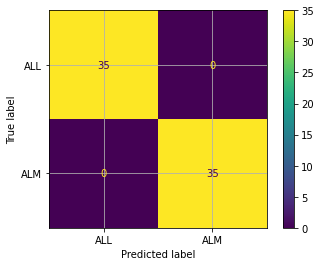

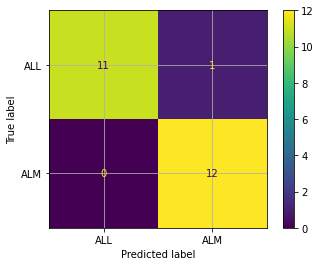

In [65]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(lr_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc1 , df_model_performance1=print_classifier_scores(lr_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Logistic Regression'  )
df_model=df_model.append(df_model_performance1,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc1, ignore_index=True)

## 9.2.  Naive Bayes - Model 2

Prediction of Cancer type using **Naive Bayes** 

Train-Set Confusion Matrix:
 [[35  0]
 [ 4 31]]
Recall Score    :  0.8857142857142857
Precision Score :  1.0
F1 Score        :  0.9393939393939393
Accuracy Score  :  0.9428571428571428
ROC AUC         :  0.9975510204081632
Test-Set Confusion Matrix:
 [[11  1]
 [ 3  9]]
Recall Score    :  0.75
Precision Score :  0.9
F1 Score        :  0.8181818181818182
Accuracy Score  :  0.8333333333333334
ROC AUC         :  0.9791666666666666


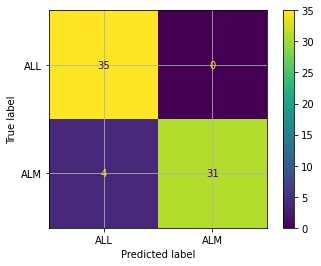

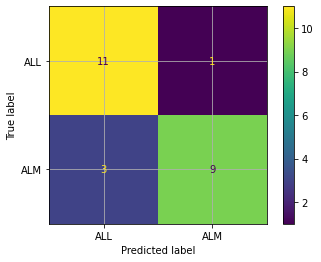

In [66]:
naivebayes = GaussianNB() 
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(naivebayes, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc2 , df_model_performance2=print_classifier_scores(naivebayes, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Naive Bayes'  )
df_model=df_model.append(df_model_performance2,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc2, ignore_index=True)

## 9.3   Decision Tree Classifier - Model 3

Prediction of Cancer type using **Decision Tree Classifier** and hyperparameter tuning by using Grid Search CV

In [67]:
dt_params = {'max_depth' :  [i for i in range(3,8,1)],
             'max_features': np.linspace(0.1, 0.5, 5, endpoint=True),
             'min_samples_leaf':  [i for i in range(1,6,1)],
             'min_samples_split':[i for i in range(1,3,1)],
             'max_leaf_nodes': list(range(2, 100)),
             'random_state' :[0,1,2 ,3, 4,5,42,99]
                 }
cross_validation = StratifiedKFold(n_splits=5,shuffle=True)
search = GridSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1, verbose=1,cv=cross_validation )
search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 196000 candidates, totalling 980000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2],
                         'random_state': [0, 1, 2, 3, 4, 5, 42, 99]},
             verbose=1)

In [68]:
dt_best_grid=get_best_hyperparameters()

Best Accuracy    : 0.8714285714285713
Best Parameters  :  {'max_depth': 5, 'max_features': 0.4, 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 2}
Best Estimators :  DecisionTreeClassifier(max_depth=5, max_features=0.4, max_leaf_nodes=6,
                       min_samples_leaf=3, random_state=2)


Train-Set Confusion Matrix:
 [[32  3]
 [ 1 34]]
Recall Score    :  0.9714285714285714
Precision Score :  0.918918918918919
F1 Score        :  0.9444444444444445
Accuracy Score  :  0.9428571428571428
ROC AUC         :  0.9857142857142858
Test-Set Confusion Matrix:
 [[7 5]
 [3 9]]
Recall Score    :  0.75
Precision Score :  0.6428571428571429
F1 Score        :  0.6923076923076924
Accuracy Score  :  0.6666666666666666
ROC AUC         :  0.704861111111111


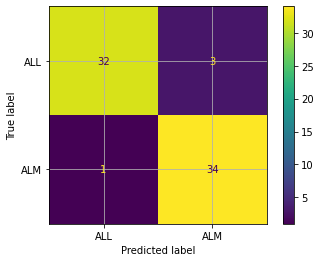

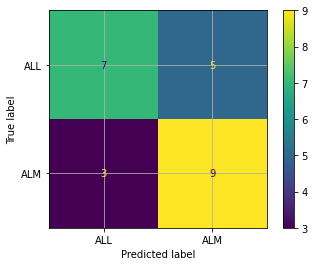

In [69]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(dt_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc3, df_model_performance3=print_classifier_scores(dt_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Decision Tree Classifier'  )
df_model=df_model.append(df_model_performance3,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc3, ignore_index=True)

## 9.4. Random Forest Classifier - Model 4

Prediction of Cancer type using **Random Forest Classifier** and hyperparameter tuning by using Grid Search CV

In [70]:
rf_params = {'bootstrap': [False, True],
         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
         'max_features': np.linspace(0.1, 0.5, 5, endpoint=True),
         'min_samples_leaf':  [i for i in range(1,6,1)],
         'min_samples_split':[i for i in range(1,3,1)],
        'random_state' :[0,1,2 ,3, 4,5,42,99]
                 }
cross_validation = StratifiedKFold(n_splits=5,shuffle=True)
search = GridSearchCV(RandomForestClassifier(), rf_params, n_jobs=-1, verbose=1,cv=cross_validation )
search.fit(X_smote_train, y_smote_train)


Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                         'random_state': [0, 1, 2, 3, 4, 5, 42, 99]},
             verbose=1)

In [71]:
rf_best_grid=get_best_hyperparameters()

Best Accuracy    : 0.8714285714285716
Best Parameters  :  {'bootstrap': True, 'max_features': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 4, 'random_state': 0}
Best Estimators :  RandomForestClassifier(max_features=0.4, min_samples_leaf=2, n_estimators=4,
                       random_state=0)


Train-Set Confusion Matrix:
 [[35  0]
 [ 1 34]]
Recall Score    :  0.9714285714285714
Precision Score :  1.0
F1 Score        :  0.9855072463768115
Accuracy Score  :  0.9857142857142858
ROC AUC         :  0.9975510204081632
Test-Set Confusion Matrix:
 [[10  2]
 [ 1 11]]
Recall Score    :  0.9166666666666666
Precision Score :  0.8461538461538461
F1 Score        :  0.8799999999999999
Accuracy Score  :  0.875
ROC AUC         :  0.9097222222222222


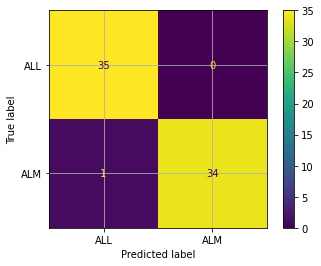

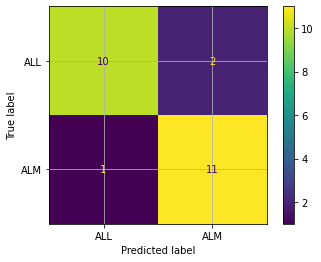

In [72]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(rf_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc4, df_model_performance4=print_classifier_scores(rf_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Random Forest Classifier'  )
df_model=df_model.append(df_model_performance4,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc4, ignore_index=True)

## 9.5.  K-Nearest Neighbours - Model 5

Prediction of Cancer type using **KNN** and hyperparameter tuning by using Grid Search CV

In [73]:
# do a grid search
knn_params = {"n_neighbors": [5,6,7],
              "weights": ["uniform", "distance"],
              "algorithm": ["ball_tree", "kd_tree", "brute"],
              "leaf_size": [5, 10,15,20,25, 30],
               "p": [2]
             }

search = GridSearchCV(KNeighborsClassifier(), knn_params, n_jobs=-1, verbose=1,cv=10 )
search.fit(X_smote_train, y_smote_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20, 25, 30],
                         'n_neighbors': [5, 6, 7], 'p': [2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [74]:
knn_best_grid=get_best_hyperparameters()

Best Accuracy    : 0.8285714285714286
Best Parameters  :  {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best Estimators :  KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=6,
                     weights='distance')


Train-Set Confusion Matrix:
 [[35  0]
 [ 0 35]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0
Test-Set Confusion Matrix:
 [[12  0]
 [ 2 10]]
Recall Score    :  0.8333333333333334
Precision Score :  1.0
F1 Score        :  0.9090909090909091
Accuracy Score  :  0.9166666666666666
ROC AUC         :  0.9861111111111112


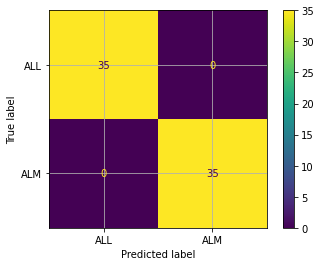

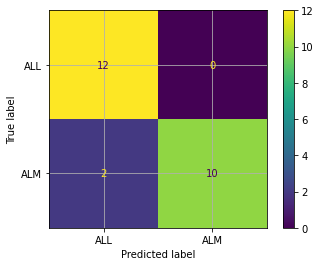

In [75]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(knn_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc5, df_model_performance5=print_classifier_scores(knn_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'K-Nearest Neighbours'  )
df_model=df_model.append(df_model_performance5,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc5, ignore_index=True)

## 9.6. Support Vector Machine - Model 6

Prediction of Cancer type using **SVM** and hyperparameter tuning by using Grid Search CV

In [76]:
# do a grid search
svc_params = [{'C': [1,2,3,4], 'kernel': ['linear'] ,'probability': [True] ,'random_state' :[55]},
              {'C': [1,2,3,4], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'probability': [True],'random_state' :[55]},
              {'C': [1,2,3,4], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
                 , 'degree':[0, 1, 2, 3, 4, 5, 6],'probability': [True] ,'random_state' :[55]}]
              
cross_validation = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)
search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1, cv=cross_validation)
search.fit(X_smote_train, y_smote_train)

Fitting 3 folds for each of 292 candidates, totalling 876 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4], 'kernel': ['linear'],
                          'probability': [True], 'random_state': [55]},
                         {'C': [1, 2, 3, 4],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf'], 'probability': [True],
                          'random_state': [55]},
                         {'C': [1, 2, 3, 4], 'degree': [0, 1, 2, 3, 4, 5, 6],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['poly'], 'probability': [True],
                          'random_state': [55]}],
             verbose=1)

In [77]:
svm_best_grid=get_best_hyperparameters()

Best Accuracy    : 0.9287439613526569
Best Parameters  :  {'C': 1, 'kernel': 'linear', 'probability': True, 'random_state': 55}
Best Estimators :  SVC(C=1, kernel='linear', probability=True, random_state=55)


Train-Set Confusion Matrix:
 [[35  0]
 [ 0 35]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0
Test-Set Confusion Matrix:
 [[11  1]
 [ 0 12]]
Recall Score    :  1.0
Precision Score :  0.9230769230769231
F1 Score        :  0.9600000000000001
Accuracy Score  :  0.9583333333333334
ROC AUC         :  1.0


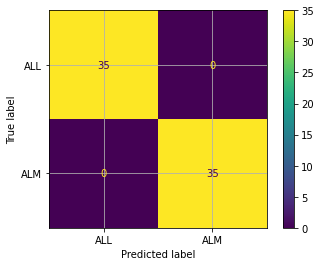

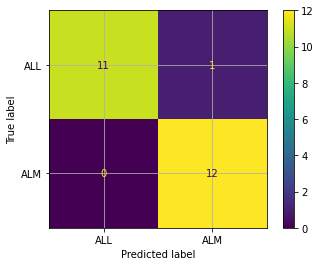

In [78]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(svm_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc6, df_model_performance6=print_classifier_scores(svm_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Support Vector Classifier'  )
df_model=df_model.append(df_model_performance6,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc6, ignore_index=True)

---
<a name = Section10></a>
# 10. Summary
---

As the dataset is balanced after the use of SMOTE technique , we will look into accuracy of the model. **Linear Regression** and **SVM** gives the best accuracy of **95.8%**



In [81]:
df_model.sort_values(by=['Accuracy Score'], ascending=False)

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,0.958333,0.960000,0.923077,1.000000,0.986111
5,Support Vector Classifier,0.958333,0.960000,0.923077,1.000000,1.000000
4,K-Nearest Neighbours,0.916667,0.909091,1.000000,0.833333,0.986111
3,Random Forest Classifier,0.875000,0.880000,0.846154,0.916667,0.909722
1,Naive Bayes,0.833333,0.818182,0.900000,0.750000,0.979167
2,Decision Tree Classifier,0.666667,0.692308,0.642857,0.750000,0.704861


In [80]:
df_model_test_train_acc.sort_values(by=['Train Accuracy Score','Test Accuracy Score'], ascending=False ,ignore_index=True)

,Model,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,1.000000,0.958333
1,Support Vector Classifier,1.000000,0.958333
2,K-Nearest Neighbours,1.000000,0.916667
3,Random Forest Classifier,0.985714,0.875000
4,Naive Bayes,0.942857,0.833333
5,Decision Tree Classifier,0.942857,0.666667
